<a href="https://colab.research.google.com/github/lbuerger/IANNwTF/blob/main/hackatron/aicc_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.animation as animate

In [ ]:
drive.mount('/content/drive', force_remount=True)
drive_str = "/content/drive/MyDrive/AICC_Data/"

Mounted at /content/drive


In [ ]:
# wöchentliche daten temperatur niederschlag "era5_all_week_modis.csv"
# monatliche feuerdaten "fire_counts_month.csv"
# jährliche landbedeckung "LCT_counts.csv"

In [ ]:
era5 = pd.read_csv(drive_str + "era5_all_week_modis.csv")
era5

,id3,t2m,time,v,h,tp,year,month,week
0,2000-1-52-v0h15,258.90340,2000-01-02,0,15,0.019327,2000,1,52
1,2000-1-52-v0h16,253.81400,2000-01-02,0,16,0.016418,2000,1,52
2,2000-1-52-v0h17,261.21814,2000-01-02,0,17,0.095829,2000,1,52
3,2000-1-52-v0h18,265.51663,2000-01-02,0,18,0.142642,2000,1,52
4,2000-1-52-v0h19,256.75390,2000-01-02,0,19,0.026167,2000,1,52
...,...,...,...,...,...,...,...,...,...
463975,2020-1-1-v17h16,260.32684,2020-01-05,17,16,0.023223,2020,1,1
463976,2020-1-1-v17h17,252.91394,2020-01-05,17,17,0.030211,2020,1,1
463977,2020-1-1-v17h18,246.56955,2020-01-05,17,18,0.065317,2020,1,1
463978,2020-1-1-v17h19,243.93672,2020-01-05,17,19,0.001916,2020,1,1


In [ ]:
era5_s = era5[["year","month","week","v","h","t2m","tp"]]
era5_s

,year,month,week,v,h,t2m,tp
0,2000,1,52,0,15,258.90340,0.019327
1,2000,1,52,0,16,253.81400,0.016418
2,2000,1,52,0,17,261.21814,0.095829
3,2000,1,52,0,18,265.51663,0.142642
4,2000,1,52,0,19,256.75390,0.026167
...,...,...,...,...,...,...,...
463975,2020,1,1,17,16,260.32684,0.023223
463976,2020,1,1,17,17,252.91394,0.030211
463977,2020,1,1,17,18,246.56955,0.065317
463978,2020,1,1,17,19,243.93672,0.001916


In [ ]:
def get_clima_data(v,h,df):
  df2 = df.loc[df["v"]==v]
  df2 = df2.loc[df2["h"]==h]
  df2 = df2.sort_values(["year","week"])
  df2 = df2._get_numeric_data()
  return df2.to_numpy(), df2.keys()

In [ ]:
clima = era5_s
get_clima_data(3,12,clima)

(array([[2.0000000e+03, 1.0000000e+00, 1.0000000e+00, ..., 1.2000000e+01,
         2.5067007e+02, 7.0557840e-02],
        [2.0000000e+03, 1.0000000e+00, 2.0000000e+00, ..., 1.2000000e+01,
         2.4740186e+02, 5.2628443e-02],
        [2.0000000e+03, 1.0000000e+00, 3.0000000e+00, ..., 1.2000000e+01,
         2.4719366e+02, 7.9593670e-02],
        ...,
        [2.0190000e+03, 1.2000000e+01, 5.1000000e+01, ..., 1.2000000e+01,
         2.5383730e+02, 9.7989040e-02],
        [2.0190000e+03, 1.2000000e+01, 5.2000000e+01, ..., 1.2000000e+01,
         2.6311066e+02, 8.0026284e-02],
        [2.0200000e+03, 1.0000000e+00, 1.0000000e+00, ..., 1.2000000e+01,
         2.6189008e+02, 2.2097439e-02]]),
 Index(['year', 'month', 'week', 'v', 'h', 't2m', 'tp'], dtype='object'))

In [ ]:
fire = pd.read_csv(drive_str + "fire_counts_month.csv")
fire

,fname,v,h,year,BurnedCells,MissingCells,LandCells,ValidLandCells,ProductStartDay,ProductEndDay,month
0,MCD64A1.A2006213.h27v05.006.2017017190426.hdf,5,27,2006,343,22312,4507441,4485129,213,243,8
1,MCD64A1.A2006182.h27v05.006.2017017181208.hdf,5,27,2006,0,20614,4507441,4486827,182,212,7
2,MCD64A1.A2006032.h27v05.006.2017017145522.hdf,5,27,2006,131,208829,4507441,4298612,32,59,2
3,MCD64A1.A2006152.h27v05.006.2017017184500.hdf,5,27,2006,102615,17557,4507441,4489884,152,181,6
4,MCD64A1.A2006091.h27v05.006.2017017162323.hdf,5,27,2006,52,14826,4507440,4492615,91,120,4
...,...,...,...,...,...,...,...,...,...,...,...
62417,MCD64A1.A2019060.h21v05.006.2019142142602.hdf,5,21,2019,54,383718,5450678,5066960,60,90,3
62418,MCD64A1.A2019091.h21v05.006.2019154210731.hdf,5,21,2019,2188,73959,5450678,5376719,91,120,4
62419,MCD64A1.A2019305.h21v05.006.2020006130535.hdf,5,21,2019,8712,8035,5450678,5442643,305,334,11
62420,MCD64A1.A2019335.h21v05.006.2020035130612.hdf,5,21,2019,3801,38791,5450678,5411887,335,365,12


In [ ]:
exists = fire[["v","h"]]
exists = exists.groupby(["v","h"]).size().reset_index()
exists

,v,h,0
0,2,9,233
1,2,10,233
2,2,11,233
3,2,12,233
4,2,13,233
...,...,...,...
263,13,29,233
264,13,30,233
265,13,31,233
266,14,13,233


In [ ]:
def existing_v():
  return fire["v"].unique()
print(existing_v())
def existing_h():
  return fire["h"].unique()
print(existing_h())

[ 5  9 11 12 13  6  2  4  8 10  3  7 14]
[27 23  2 16 22 11 20 10 33 30 32 19  8 14 13  7  9 15 29 24 26 28 12 25
  3 31  6 17 18 35 21  0  5  1  4 34]


In [ ]:
def existing_v_h():
  df2 = pd.read_csv(drive_str + "temp_rain_fire_modis.csv")
  df2 = df2.apply(lambda x: (x["v"],x["h"]),axis=1)
  df2 = df2.unique()
  return df2
existing_v_h()

array([(2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15),
       (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22),
       (2, 23), (2, 24), (2, 25), (2, 26), (3, 7), (3, 8), (3, 9),
       (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 17),
       (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24),
       (3, 25), (3, 26), (3, 27), (3, 28), (4, 8), (4, 9), (4, 10),
       (4, 11), (4, 12), (4, 13), (4, 14), (4, 17), (4, 18), (4, 19),
       (4, 20), (4, 21), (4, 22), (4, 23), (4, 24), (4, 25), (4, 26),
       (4, 27), (4, 28), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11),
       (5, 12), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19), (5, 20),
       (5, 21), (5, 22), (5, 23), (5, 24), (5, 25), (5, 26), (5, 27),
       (5, 28), (5, 29), (5, 30), (6, 2), (6, 3), (6, 7), (6, 8), (6, 9),
       (6, 10), (6, 11), (6, 16), (6, 17), (6, 18), (6, 19), (6, 20),
       (6, 21), (6, 22), (6, 23), (6, 24), (6, 25), (6, 26), (6, 27),
       (6, 28), (6, 29), 

In [ ]:
def check_exists(v,h):
  df2 = exists

In [ ]:
def get_fire_data(v,h,df):
  df2 = df.loc[df["v"]==v]
  df2 = df2.loc[df2["h"]==h]
  df2 = df2.sort_values(["year","month"])
  df2 = df2._get_numeric_data()
  return df2.to_numpy(), df2.keys()

In [ ]:
get_fire_data(5,27,fire)

(array([[   5,   27, 2000, ...,  306,  335,   11],
        [   5,   27, 2000, ...,  336,  366,   12],
        [   5,   27, 2001, ...,    1,   31,    1],
        ...,
        [   5,   27, 2020, ...,    1,   31,    1],
        [   5,   27, 2020, ...,   32,   60,    2],
        [   5,   27, 2020, ...,   61,   91,    3]]),
 Index(['v', 'h', 'year', 'BurnedCells', 'MissingCells', 'LandCells',
        'ValidLandCells', 'ProductStartDay', 'ProductEndDay', 'month'],
       dtype='object'))

In [ ]:
landcover = pd.read_csv(drive_str + "LCT_counts.csv")
landcover

,year,v,h,lct,n_pixels
0,2006,5,27,1,672
1,2006,5,27,2,1019
2,2006,5,27,3,27
3,2006,5,27,4,311591
4,2006,5,27,5,119604
...,...,...,...,...,...
56921,2012,10,35,10,3057
56922,2012,10,35,11,2528
56923,2012,10,35,12,446
56924,2012,10,35,14,43


In [ ]:
lct = landcover.pivot(index=["year","v","h"], columns="lct", values="n_pixels")
lct = lct.fillna(0)
lct = lct.reset_index()
lct

lct,year,v,h,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2001,0,16,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,61213.0,310.0,0.0,0.0,0.0,158664.0,151968.0,6941.0
1,2001,0,17,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,33542.0,221.0,0.0,0.0,0.0,497510.0,211650.0,13564.0
2,2001,0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,16.0,0.0,0.0,0.0,63704.0,15208.0,1649.0
3,2001,0,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,52662.0,4215.0,294.0
4,2001,1,12,0.0,0.0,0.0,0.0,0.0,0.0,36594.0,0.0,0.0,132047.0,17030.0,0.0,0.0,0.0,494.0,2975.0,186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,2017,14,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,386.0,659.0,0.0,0.0,0.0,101.0,1707.0,203.0
4856,2017,14,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4857,2017,14,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,3.0,37.0
4858,2017,14,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,280.0,6.0,174.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def get_plant_data(v,h,df):
    df2 = df.loc[df["v"]==v]
    df2 = df2.loc[df2["h"]==h]
    df2 = df2.sort_values(["year"])
    df2 = df2._get_numeric_data()
    return df2.to_numpy(), df2.keys()

In [ ]:
plants = lct
get_plant_data(5,10,plants)

(array([[2.001000e+03, 5.000000e+00, 1.000000e+01, 1.284200e+04,
         1.297820e+05, 9.000000e+00, 8.007690e+05, 2.044510e+05,
         8.000000e+00, 1.600000e+01, 1.428066e+06, 5.874380e+05,
         9.595770e+05, 1.943300e+04, 1.165917e+06, 3.599900e+04,
         8.858200e+04, 0.000000e+00, 4.000000e+02, 9.200000e+01],
        [2.002000e+03, 5.000000e+00, 1.000000e+01, 1.309600e+04,
         1.273030e+05, 1.000000e+01, 8.060780e+05, 2.070190e+05,
         8.000000e+00, 8.000000e+00, 1.405178e+06, 5.826160e+05,
         9.640700e+05, 1.951900e+04, 1.168462e+06, 3.570100e+04,
         8.571200e+04, 0.000000e+00, 4.070000e+02, 1.070000e+02],
        [2.003000e+03, 5.000000e+00, 1.000000e+01, 1.365800e+04,
         1.247960e+05, 1.500000e+01, 8.091580e+05, 2.109230e+05,
         1.000000e+01, 4.000000e+00, 1.388093e+06, 5.832300e+05,
         9.655840e+05, 1.986500e+04, 1.175725e+06, 3.553200e+04,
         8.645000e+04, 0.000000e+00, 4.260000e+02, 1.330000e+02],
        [2.004000e+03,

In [ ]:
future = pd.read_csv(drive_str + "cmip6_all_week_modis.csv")

def future_data_generator():
  cells = existing_v_h()
  num_cells = len(cells)
  for track_keep, (v, h) in enumerate(cells):
    try:
      print('progress: %1.3f'%(track_keep/num_cells))
      #plant data is in years
      plant_data, _ = get_plant_data(v, h, plants)
      #climate is every week
      climate_data, _ = get_clima_data(v,h,future)
      #fire data is monthly
      fire_data, _ = get_fire_data(v,h,fire)
      year_month = climate_data[:,0:2].astype(np.int32)
      #plant_agg = []
      #fire_agg = []
      years = year_month[:,0]
      #mask_upper_bound = years.astype(np.int32)<=2017
      #mask_lower_bound = years = years.astype(np.int32)>=2001
      #years_mask = np.logical_and(mask_upper_bound, mask_lower_bound)
      #climate_data = climate_data[years_mask]
      year_month = climate_data[:,0:2].astype(np.int32)
      agg = []
      #target_agg = []
      #data is climate data for a week
      #fire data and plant data are repeated over a timescale along those weeks, as they are rare
      for data in climate_data:
        #month = data[1]
        #year = data[0]
        pl_vec = np.squeeze(plant_data[plant_data[:,0]==2017])
        fire_vec = np.squeeze(fire_data[np.logical_and(fire_data[:,-1]==1, fire_data[:,2]==2017)])
        #target_agg.append(fire_vec[3])
        pl_vec = pl_vec[3::]
        fire_vec = fire_vec[5]
        input_vec = np.concatenate((data[3:], fire_vec, pl_vec),axis=None)
        agg.append(input_vec)
      #target = np.stack(target_agg)
      data_input = np.stack(agg)
      print(data_input.shape)
      yield data_input, (v,h)
    except:
      print('v%1.1f:::h%1.1f faulty!!!!!!!'%(v,h))
      pass

agg_fut = []
agg_fut_vh = []
for data_series, vh in future_data_generator():
  try:
    assert(data_series.shape==(4175,22)), data_series.shape
    #assert(out_series.shape==(887,)), out_series.shape
    agg_fut.append(data_series)
    agg_fut_vh.append(vh)
  except:
    pass
  
#target_ndarray = np.stack(target_agg)
fut_data_ndarray = np.stack(agg_fut)
print("future data shape:" , fut_data_ndarray.shape)
fut_data_vh_ndarray = np.stack(agg_fut_vh)
print("future data vh tiles shape:", fut_data_vh_ndarray.shape)

progress: 0.000
(4175, 22)
progress: 0.004
(4175, 22)
progress: 0.008
(4175, 22)
progress: 0.011
(4175, 22)
progress: 0.015
(4175, 22)
progress: 0.019
(4175, 22)
progress: 0.023
(4175, 22)
progress: 0.026
(4175, 22)
progress: 0.030
(4175, 22)
progress: 0.034
(4175, 22)
progress: 0.038
(4175, 22)
progress: 0.041
(4175, 22)
progress: 0.045
(4175, 22)
progress: 0.049
(4175, 22)
progress: 0.053
(4175, 22)
progress: 0.056
(4175, 22)
progress: 0.060
(4175, 22)
progress: 0.064
(4175, 22)
progress: 0.068
(4175, 22)
progress: 0.071
(4175, 22)
progress: 0.075
(4175, 22)
progress: 0.079
(4175, 22)
progress: 0.083
(4175, 22)
progress: 0.086
(4175, 22)
progress: 0.090
(4175, 22)
progress: 0.094
(4175, 22)
progress: 0.098
(4175, 22)
progress: 0.102
(4175, 22)
progress: 0.105
(4175, 22)
progress: 0.109
(4175, 22)
progress: 0.113
(4175, 22)
progress: 0.117
(4175, 22)
progress: 0.120
(4175, 22)
progress: 0.124
(4175, 22)
progress: 0.128
(4175, 22)
progress: 0.132
(4175, 22)
progress: 0.135
(4175, 22)
p

In [ ]:
def data_generator():
  cells = existing_v_h()
  num_cells = len(cells)
  for track_keep, (v, h) in enumerate(cells):
    try:
      print('progress: %1.3f'%(track_keep/num_cells))
      #plant data is in years
      plant_data, _ = get_plant_data(v, h, plants)
      #climate is every week
      climate_data, _ = get_clima_data(v,h,clima)
      #fire data is monthly
      fire_data, _ = get_fire_data(v,h,fire)
      year_month = climate_data[:,0:2].astype(np.int32)
      plant_agg = []
      fire_agg = []
      years = year_month[:,0]
      mask_upper_bound = years.astype(np.int32)<=2017
      mask_lower_bound = years = years.astype(np.int32)>=2001
      years_mask = np.logical_and(mask_upper_bound, mask_lower_bound)
      climate_data = climate_data[years_mask]
      year_month = climate_data[:,0:2].astype(np.int32)
      agg = []
      target_agg = []
      #data is climate data for a week
      #fire data and plant data are repeated over a timescale along those weeks, as they are rare
      for data in climate_data:
        month = data[1]
        year = data[0]
        pl_vec = np.squeeze(plant_data[plant_data[:,0]==year])
        fire_vec = np.squeeze(fire_data[np.logical_and(fire_data[:,-1]==month, fire_data[:,2]==year)])
        target_agg.append(fire_vec[3])
        pl_vec = pl_vec[3::]
        fire_vec = fire_vec[5]
        input_vec = np.concatenate((data[3:], fire_vec, pl_vec),axis=None)
        agg.append(input_vec)
      target = np.stack(target_agg)
      data_input = np.stack(agg)
      print(target.shape, data_input.shape)
      yield (data_input, target)
    except:
      print('v%1.1f:::h%1.1f faulty!!!!!!!'%(v,h))
      pass



In [ ]:
agg = []
target_agg = []
for data_series, out_series in data_generator():
  try:
    assert(data_series.shape==(887,22)), data_series.shape
    assert(out_series.shape==(887,)), out_series.shape
    agg.append(data_series)
    target_agg.append(out_series)
  except:
    pass
  
target_ndarray = np.stack(target_agg)
data_ndarray = np.stack(agg)



progress: 0.000
(887,) (887, 22)
progress: 0.004
(887,) (887, 22)
progress: 0.008
(887,) (887, 22)
progress: 0.011
(887,) (887, 22)
progress: 0.015
(887,) (887, 22)
progress: 0.019
(887,) (887, 22)
progress: 0.023
(887,) (887, 22)
progress: 0.026
(887,) (887, 22)
progress: 0.030
(887,) (887, 22)
progress: 0.034
(887,) (887, 22)
progress: 0.038
(887,) (887, 22)
progress: 0.041
(887,) (887, 22)
progress: 0.045
(887,) (887, 22)
progress: 0.049
(887,) (887, 22)
progress: 0.053
(887,) (887, 22)
progress: 0.056
(887,) (887, 22)
progress: 0.060
(887,) (887, 22)
progress: 0.064
(887,) (887, 22)
progress: 0.068
(887,) (887, 22)
progress: 0.071
(887,) (887, 22)
progress: 0.075
(887,) (887, 22)
progress: 0.079
(887,) (887, 22)
progress: 0.083
(887,) (887, 22)
progress: 0.086
(887,) (887, 22)
progress: 0.090
(887,) (887, 22)
progress: 0.094
(887,) (887, 22)
progress: 0.098
(887,) (887, 22)
progress: 0.102
(887,) (887, 22)
progress: 0.105
(887,) (887, 22)
progress: 0.109
(887,) (887, 22)
progress: 

(258, 887)
(258, 887, 22)
(228846,)
(228846, 22)
() ()
(22,) (22,)


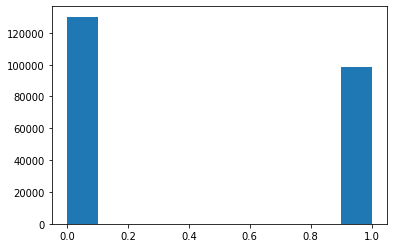

In [ ]:
import matplotlib.pyplot as plt


print(target_ndarray.shape)
print(data_ndarray.shape)
for_normalizing_nd_targets = np.concatenate([np.squeeze(x) for x in np.split(target_ndarray, 258)])
plt.hist(np.clip(np.squeeze(for_normalizing_nd_targets), -1, 1))
for_normalizing_nd_data = np.concatenate([np.squeeze(x) for x in np.split(data_ndarray, 258)])
print(for_normalizing_nd_targets.shape)
print(for_normalizing_nd_data.shape)
mean_targets = np.mean(for_normalizing_nd_targets)
sigma_targets = np.std(for_normalizing_nd_targets)
mean_data = np.mean(for_normalizing_nd_data, axis=0)
sigma_data = np.std(for_normalizing_nd_data, axis=0)
print(mean_targets.shape, sigma_targets.shape)
print(mean_data.shape, sigma_data.shape)

normalized_targets = (target_ndarray - mean_targets)/sigma_targets
normalized_data = (data_ndarray - mean_data)/sigma_data
normalized_data_future = (fut_data_ndarray - mean_data)/sigma_data


In [ ]:
#6months
sequence_length = 24
batch_size_training = 256
prefetch_size_training = 100
repeats = 100

REGRESSION = True

def cut_sub_sequence(data, targets, sequence_length):
  in_seq_len = data.shape[0]
  start = tf.random.uniform((1,), minval=0, maxval=in_seq_len - sequence_length, dtype=tf.int32)
  start = start[0]
  end = start + sequence_length
  cut_sequence_target = targets[start:end]
  cut_sequence_data = data[start:end,:]

  #binary burning or not 
  if not REGRESSION:
    cut_sequence_target = tf.cast(tf.math.minimum(cut_sequence_target, tf.ones_like(cut_sequence_target)), tf.float32)
  return cut_sequence_data, cut_sequence_target

target_datas = normalized_targets if REGRESSION else target_ndarray

data_pipeline = tf.data.Dataset.from_tensor_slices((normalized_data, target_datas))
data_pipeline = data_pipeline.repeat(100)
data_pipeline = data_pipeline.shuffle(50000)
data_pipeline = data_pipeline.map(lambda x,y: cut_sub_sequence(x,y, sequence_length))
data_pipeline = data_pipeline.batch(batch_size_training).prefetch(prefetch_size_training)





In [ ]:
class Model_Scorched_Earth(tf.keras.Model):
  def __init__(self):
    super(Model_Scorched_Earth, self).__init__()
    self.embedding = tf.keras.layers.Dense(84, activation = tf.nn.relu)
    self.LSTM_1 = tf.keras.layers.LSTM(84, return_sequences=True, unroll=True)
    self.LSTM_2 = tf.keras.layers.LSTM(84, return_sequences=True, unroll=True)
    self.out_layer = tf.keras.layers.Dense(64, activation=tf.nn.tanh)
    read_out_activation = tf.keras.activations.linear if REGRESSION else tf.nn.sigmoid
    self.read_out = tf.keras.layers.Dense(1, activation=read_out_activation)

  def call(self, x):
    x = self.embedding(x)
    x = self.LSTM_1(x)
    x = self.LSTM_2(x)
    x = self.out_layer(x)
    x = self.read_out(x)
    return x


In [ ]:
#Training
@tf.function
def train_step(model, input, target, loss_function, optimizer, last_timesteps = 1):
    # loss_object and optimizer_object are instances of respective tensorflow classes
    with tf.GradientTape() as tape:
        prediction = model(input)
        prediction = tf.squeeze(prediction)
        #tf.print(f"target: {target[:,(-1*last_timesteps):].shape} prediction: {prediction[:,(-1*last_timesteps):].shape}")
        loss = loss_function(target[:,(-1*last_timesteps):], prediction[:,(-1*last_timesteps):])
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss 


import time
tf.keras.backend.clear_session()

### Hyperparameters
num_epochs = 200
learning_rate = 0.0001
running_average_factor = 0.99

# Initialize the model.
model = Model_Scorched_Earth()
# Initialize the loss: categorical cross entropy. Check out 'tf.keras.losses'.
categorical_entropy_loss = tf.keras.losses.BinaryCrossentropy() if not REGRESSION else tf.keras.losses.MeanSquaredError()
# optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate)

# Initialize lists for later visualization.
train_losses = []
test_losses = []
test_accuracies = []

# We train for num_epochs epochs.
for epoch in range(num_epochs):
    print('Epoch: __ ' + str(epoch))
    #training (and checking in with training)
    start = time.perf_counter()
    running_average = 0
    for (input,target) in data_pipeline:
        print("|", end= "")
        train_loss = train_step(model, input, target, categorical_entropy_loss, optimizer)
        running_average = running_average_factor * running_average  + (1 - running_average_factor) * train_loss
    train_losses.append(running_average)
    end = time.perf_counter()
    if epoch%5==0:
      model.save_weights(drive_str + 'scorched_n__epoch_' + str(epoch))
    print('BCE:%5.6f  ||| time%2.3f'%(np.mean(running_average), end-start))

Epoch: __ 0
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||BCE:0.295300  ||| time22.393
Epoch: __ 1
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||BCE:0.225414  ||| time15.412
Epoch: __ 2
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||BCE:0.202327  ||| time15.287
Epoch: __ 3
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||BCE:0.172696  ||| time15.063
Epoch: __ 4
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||BCE:0.163646  ||| time15.181
Epoch: __ 5
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||BCE:0.156823  ||| time15.048
Epoch: __ 6
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||BCE:0.153291  ||| time15.419
Epoch:

In [ ]:
def get_prediction(cell_data, model):
  timesteps = cell_data.shape[0]
  truesteps = timesteps - sequence_length
  agg = []
  for i in range(truesteps):
    i_end = i+sequence_length
    agg.append(cell_data[i:i_end])
  batch = np.stack(agg)
  out = model(batch)
  out = np.squeeze(out[:,-1])
  return out





In [ ]:
#def get_prediction(model,array):
#  return np.random.rand(array.shape[0]-sequence_length)
# feed future data
print(normalized_data_future.shape) 
print(fut_data_vh_ndarray.shape)
fut_shape = normalized_data_future.shape
fut_time_length = fut_shape[1]-sequence_length
pred_array = np.zeros((18,38, fut_time_length))
count = 0
for cell in range(fut_shape[0]):
  pred = get_prediction(normalized_data_future[cell,:,:],model)
  #normalized_targets = (target_ndarray - mean_targets)/sigma_targets
  if REGRESSION == True:
    pred = pred *sigma_targets + mean_targets
  v,h = fut_data_vh_ndarray[cell]
  pred_array[v,h] = pred
  count += 1
  #print("cell",v,h,"done",cell/fut_shape[0])
  print("cell ({},{}) done; progress {:1.3f}".format(v,h,cell/fut_shape[0]))


(263, 4175, 22)
(263, 2)
cell (2,9) done; progress 0.000
cell (2,10) done; progress 0.004
cell (2,11) done; progress 0.008
cell (2,12) done; progress 0.011
cell (2,13) done; progress 0.015
cell (2,14) done; progress 0.019
cell (2,15) done; progress 0.023
cell (2,16) done; progress 0.027
cell (2,17) done; progress 0.030
cell (2,18) done; progress 0.034
cell (2,19) done; progress 0.038
cell (2,20) done; progress 0.042
cell (2,21) done; progress 0.046
cell (2,22) done; progress 0.049
cell (2,23) done; progress 0.053
cell (2,24) done; progress 0.057
cell (2,25) done; progress 0.061
cell (2,26) done; progress 0.065
cell (3,7) done; progress 0.068
cell (3,8) done; progress 0.072
cell (3,9) done; progress 0.076
cell (3,10) done; progress 0.080
cell (3,11) done; progress 0.084
cell (3,12) done; progress 0.087
cell (3,13) done; progress 0.091
cell (3,14) done; progress 0.095
cell (3,15) done; progress 0.099
cell (3,17) done; progress 0.103
cell (3,18) done; progress 0.106
cell (3,19) done; prog

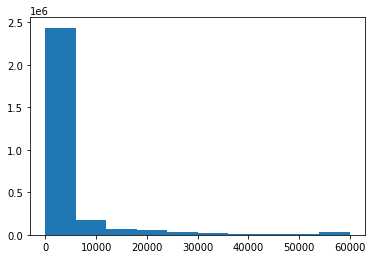

In [ ]:

pred_clip = pred_array.clip(0,60000)
plt.hist(pred_clip.flatten())
plt.show()

In [ ]:
min_val = np.min(pred_clip)
max_val = np.max(pred_clip)
print(min_val, max_val)
#print(pred_array[:,:,0])
Writer = animation.writers['ffmpeg']
writer = Writer(fps=13, metadata=dict(artist='Me'), bitrate=-1)
fig, ax = plt.subplots()
ims = []
#fourcc
year_last = 0
skip=False
for week in range(fut_time_length):
  if skip==True:
    skip=False
    continue
  skip=True
  year = 2020+int(((sequence_length + week)/52.1429)) 
  if not year == year_last:
    year_last = year
    print(year)
  #ax.set_title("Year {}".format(year))
  im = ax.imshow(pred_clip[:,:,week],vmin=min_val, vmax=max_val,cmap="plasma",interpolation='none',)
  title = ax.text(0.5,1.05,"Year {}".format(year), 
                    size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax.transAxes, )
  ims.append([im, title])
  plt.axis('off')
  #break
im_ani = animation.ArtistAnimation(fig, ims, interval=1/52, repeat_delay=3000,
                                   blit=True)
  #plt.imshow(pred_array[:,:,week])
#plt.show()
  
print("saving")
im_ani.save(drive_str+ 'burning4.mp4', writer=writer)

0.0 0.9999923706054688


NameError: ignored

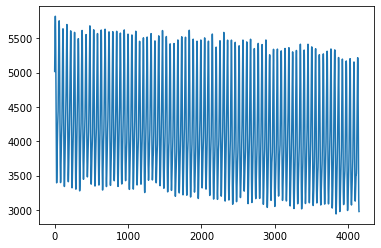

In [ ]:
mean_2 = []
for i in range(pred_clip.shape[2]):
  mean_2.append(np.mean(pred_array[:,:,i]))

plt.plot(mean_2)
plt.show()